### Home work № 1:

In [1]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 


from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, log_loss
from sklearn.metrics import confusion_matrix, log_loss, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import train_test_split
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv("./WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


#### Task № 1: Какое соотношение мужчин и женщин в представленном наборе данных?

In [3]:
df['gender'].value_counts(normalize=True)



Male      0.504756
Female    0.495244
Name: gender, dtype: float64

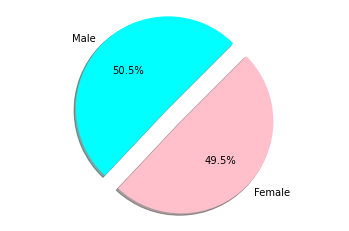

In [4]:
fig1, ax1 = plt.subplots()
explode = (0.1, 0.1)
colors = ( 'cyan', 'pink') 
ax1.pie(df['gender'].value_counts(normalize=True), explode=explode, colors=colors, 
        labels=['Male','Female'], autopct='%1.1f%%', startangle=45, shadow=True)
ax1.axis('equal')  
plt.show()

##### Task № 2: Какое количество уникальных значений у поля InternetService?

In [5]:
df['InternetService'].unique()

array(['DSL', 'Fiber optic', 'No'], dtype=object)

In [6]:
df['InternetService'].describe()[1]

3

##### Task № 3: Выведите статистики по полю TotalCharges (median, mean, std).

In [7]:
df.replace({'TotalCharges' : { ' ' : 0}}, inplace=True)

In [8]:
df['TotalCharges'].apply(pd.to_numeric, errors='ignore').describe()

count    7043.000000
mean     2279.734304
std      2266.794470
min         0.000000
25%       398.550000
50%      1394.550000
75%      3786.600000
max      8684.800000
Name: TotalCharges, dtype: float64

##### Task № 4: Сделайте замену значений поля PhoneService на числовые (Yes->1, No->0)

In [9]:
df['PhoneService']

0        No
1       Yes
2       Yes
3        No
4       Yes
       ... 
7038    Yes
7039    Yes
7040     No
7041    Yes
7042    Yes
Name: PhoneService, Length: 7043, dtype: object

In [10]:
df.replace({'PhoneService' : { 'No' : 0, 'Yes' : 1}}, inplace=True)


In [11]:
df['PhoneService']

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

##### Task № 5: Сделайте замену пробелов в поле TotalCharges на np.nan и приведите поле к типу данных float32. Затем заполните оставшиеся пропуски значением 0 с помощью метода fillna у столбца. Снова выведите статистики и сравните с тем, что вы видели в вопросе 3.

In [12]:
df.replace({'TotalCharges' : { ' ' : np.nan}}, inplace=True)
df['TotalCharges'] = df['TotalCharges'].astype(np.float32)
df['TotalCharges'].fillna(0)
df['TotalCharges'].describe()

count    7043.000000
mean     2279.732178
std      2266.794434
min         0.000000
25%       398.549988
50%      1394.550049
75%      3786.599976
max      8684.799805
Name: TotalCharges, dtype: float64

##### Task № 6: Сделайте замену значений поля Churn на числовые (Yes -> 1, No - 0)

In [13]:
df.replace({'Churn' : { 'No' : 0, 'Yes' : 1}}, inplace=True)

In [14]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: int64

##### Task № 7: Сделайте замену значений полей StreamingMovies, StreamingTV, TechSupport на числовые                     
##### (Yes -> 1, No -> 0, No internet service->0)

In [15]:
df.replace({'StreamingMovies' : { 'No' : 0, 'Yes' : 1, 'No internet service' : 0},
            'StreamingTV' : { 'No' : 0, 'Yes' : 1, 'No internet service' : 0},
            'TechSupport' : { 'No' : 0, 'Yes' : 1, 'No internet service' : 0}}, inplace=True)

In [16]:
df[['StreamingMovies', 'StreamingTV', 'TechSupport']]

,StreamingMovies,StreamingTV,TechSupport
0,0,0,0
1,0,0,0
2,0,0,0
3,0,0,1
4,0,0,0
...,...,...,...
7038,1,1,1
7039,1,1,0
7040,0,0,0
7041,0,0,0


##### Task № 8.1: Заполните пропуски в поле PhoneService значением 0

In [17]:
df['PhoneService'].unique()

array([0, 1], dtype=int64)

In [18]:
# можно не заполнять потому что их просто нет :)
df['PhoneService'].fillna(0)

0       0
1       1
2       1
3       0
4       1
       ..
7038    1
7039    1
7040    0
7041    1
7042    1
Name: PhoneService, Length: 7043, dtype: int64

##### Task № 8.2: Для нашего датасета оставьте только указанный ниже список полей, удалив все другие и выведите верхние 3 строки

In [19]:
columns = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 
           'StreamingMovies', 'StreamingTV', 'TechSupport', 'Churn']
df = df[columns]
df.head(3)

,gender,tenure,PhoneService,TotalCharges,StreamingMovies,StreamingTV,TechSupport,Churn
0,Female,1,0,29.850000,0,0,0,0
1,Male,34,1,1889.500000,0,0,0,0
2,Male,2,1,108.150002,0,0,0,1


##### Task № 9: Разделите датасет на тренировочную и тестовую выборку (подсказка - воспользуйтесь train_test_split из sklearn.model_selection

In [20]:
features = ['gender', 'tenure', 'PhoneService', 'TotalCharges', 'StreamingMovies', 'StreamingTV', 'TechSupport']
target = 'Churn'
X_train, X_test, y_train, y_test = train_test_split(df[features], df[target], test_size=0.3, random_state=42)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(df[features], df[target], test_size=0.3, random_state=42)

##### Task № 10: Cоберите pipeline для поля gender (нужно разобраться и изучить https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html ) из классов ColumnSelector и OHEEncoder, которые уже написаны ниже заранее

In [21]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.key]
    
class NumberSelector(BaseEstimator, TransformerMixin):
    """
    Transformer to select a single column from the data frame to perform additional transformations on
    Use on numeric columns in the data
    """
    def __init__(self, key):
        self.key = key

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[[self.key]]
    
class OHEEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, key):
        self.key = key
        self.columns = []

    def fit(self, X, y=None):
        self.columns = [col for col in pd.get_dummies(X, prefix=self.key).columns]
        return self

    def transform(self, X):
        X = pd.get_dummies(X, prefix=self.key)
        test_columns = [col for col in X.columns]
        for col_ in test_columns:
            if col_ not in self.columns:
                X[col_] = 0
        return X[self.columns]

gender = Pipeline([('selector', ColumnSelector(key='gender')), 
                   ('ohe', OHEEncoder(key='gender'))])

##### Task № 11: Вызовите метод fit_transform у пайплайна gender и передайте туда нашу тренировочную выборку (пример по ссылке из документации https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html#sklearn.pipeline.Pipeline.fit)

In [22]:
gender.fit_transform(X_train)

,gender_Female,gender_Male
1695,0,1
1095,0,1
3889,0,1
3667,1,0
2902,1,0
...,...,...
3772,0,1
5191,1,0
5226,0,1
5390,0,1


##### Task № 12: Здесь код писать уже не нужно (все сделано за вас). К полю tenure применяем StandardScaler (нормируем и центрируем). Ссылка - https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html. В каких случаях это может быть полезно?

In [23]:
tenure =  Pipeline([('selector', NumberSelector(key='tenure')), 
                    ('standard', StandardScaler())])

StandardScaler используется для изменения размера распределения значений так, чтобы среднее значение наблюдаемых значений было равно 0, а стандартное отклонение – 1. 
Идея StandardScaler заключается в том, что переменные, которые измеряются в разных масштабах, не влияют в равной степени на соответствие модели и обучающую функцию модели и могут в конечном итоге создать систематическую ошибку.
Его применяют для того чтобы справиться с этой потенциальной проблемой. Стандартизировать данные $(μ = 0, σ = 1)$, прежде чем их интегрировать в модель машинного обучения.

##### Task № 13: Напишите аналогичный (как для tenure) преобразователь поля TotalCharges.

In [24]:
TotalCharges =  Pipeline([('selector', NumberSelector(key='TotalCharges')), 
                          ('standard', StandardScaler())])

Объединение всех "кубиков" очень легко сделать таким образом

In [25]:
number_features = Pipeline([('selector', ColumnSelector(key=['PhoneService', 'StreamingMovies', 
                                                             'StreamingTV', 'TechSupport']))])
feats = FeatureUnion([('tenure', tenure),
                      ('TotalCharges', TotalCharges),
                      ('continuos_features', number_features),
                      ('gender', gender)])
feature_processing = Pipeline([('feats', feats)])

На этом этапе что мы сделали:
1. написали преобразователь поля gender, который делает OHE кодирование
2. написали преобразователь для поля tenure, который нормирует и центрирует его 
3. повторили п. 2 для поля TotalCharges
3. для всех остальных просто взяли признаки как они есть, без изменений

У нас уже готов наш пайплайн, который преобразовывает признаки. Давайте обучим модель поверх него. В качестве модели возьмем RandomForestClassifier

In [26]:
pipeline = Pipeline([('features',feats),
                     ('classifier', RandomForestClassifier(random_state = 42))])

pipeline.fit(X_train, y_train)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

In [27]:
pipeline_2 = Pipeline([('features',feats), 
                     ('clf', LogisticRegression(C = 2.0, random_state = 42))])
pipeline_2.fit(X_train_2, y_train_2)

Pipeline(steps=[('features',
                 FeatureUnion(transformer_list=[('tenure',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='tenure')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('TotalCharges',
                                                 Pipeline(steps=[('selector',
                                                                  NumberSelector(key='TotalCharges')),
                                                                 ('standard',
                                                                  StandardScaler())])),
                                                ('continuos_features',
                                                 Pipeline(steps=[('selector',
          

##### Task № 14: Сделайте прогноз вероятности оттока для X_test с помощью нашего предобученного на предыдущем шаге пайплайна и убедитесь что вам возвращаются вероятности для 2 классов

In [28]:
preds = pipeline.predict_proba(X_test)
preds

array([[0.29, 0.71],
       [1.  , 0.  ],
       [1.  , 0.  ],
       ...,
       [0.93, 0.07],
       [0.23, 0.77],
       [0.94, 0.06]])

In [29]:
preds_2 = pipeline_2.predict_proba(X_test)
preds_2

array([[0.39949137, 0.60050863],
       [0.97042889, 0.02957111],
       [0.98947437, 0.01052563],
       ...,
       [0.97158579, 0.02841421],
       [0.6169903 , 0.3830097 ],
       [0.89210581, 0.10789419]])

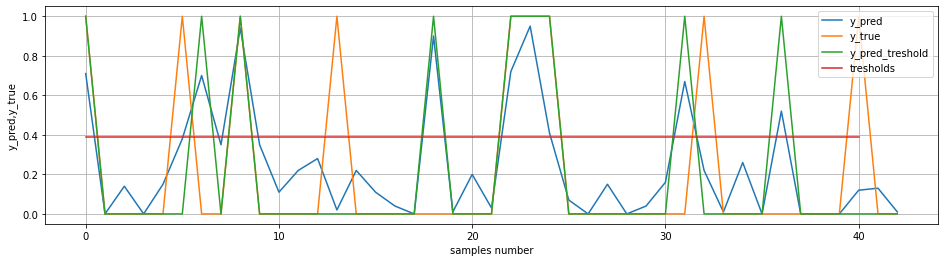

In [30]:
tresholds = 0.39

plt.figure(figsize=(16,4))
plt.grid(True)
plt.xlabel('samples number')
plt.ylabel('y_pred,y_true')

plt.plot(preds[::50,1], label = 'y_pred')
plt.plot(y_test.values[::50],label = 'y_true')
plt.plot(preds[::50,1]>tresholds,label = 'y_pred_treshold')
plt.plot([0,40],[tresholds,tresholds],label = 'tresholds')

tresholds
plt.legend()
plt.show()

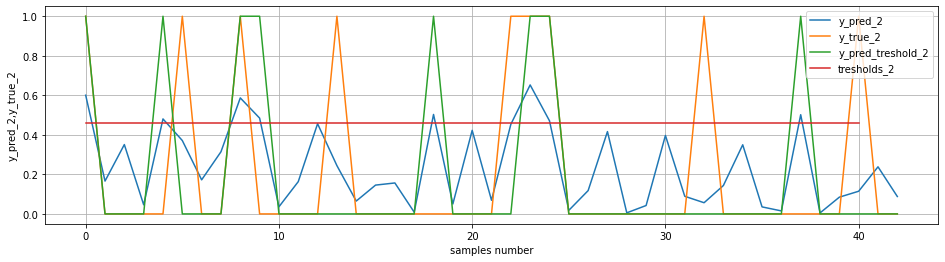

In [31]:
tresholds_2 = 0.46

plt.figure(figsize=(16,4))
plt.grid(True)
plt.xlabel('samples number')
plt.ylabel('y_pred_2,y_true_2')

plt.plot(preds_2[::50,1], label = 'y_pred_2')
plt.plot(y_test_2.values[::50],label = 'y_true_2')
plt.plot(preds_2[::50,1]>tresholds_2,label = 'y_pred_treshold_2')
plt.plot([0,40],[tresholds_2,tresholds_2],label = 'tresholds_2')

tresholds_2
plt.legend()
plt.show()

##### Task № 15: Посчитайте метрики качества получившейся модели (roc_auc, logloss)

In [32]:
print("RandomForest roc auc score: {}".format(roc_auc_score(y_true=y_test, y_score=pipeline.predict_proba(X_test)[:,1])))
print("RandomForest log loss score: {}".format(log_loss(y_true=y_test, y_pred=pipeline.predict_proba(X_test)[:,1])))
print("LogisticRegression roc auc score: {}".
      format(roc_auc_score(y_true=y_test_2, y_score=pipeline_2.predict_proba(X_test_2)[:,1])))
print("LogisticRegression log loss score: {}".
      format(log_loss(y_true=y_test_2, y_pred=pipeline_2.predict_proba(X_test_2)[:,1])))

RandomForest roc auc score: 0.7920710765169473
RandomForest log loss score: 0.7093278035153542
LogisticRegression roc auc score: 0.8133799947022027
LogisticRegression log loss score: 0.4566594890000926


In [33]:
b=5

precision, recall, thresholds = precision_recall_curve(y_test.values, preds[:,1])
fscore = (1+b**2)*(precision * recall) / (b**2*precision + recall)
# locate the index of the largest f score
ix = np.argmax(fscore)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds[ix], 
                                                                        fscore[ix],
                                                                        precision[ix],
                                                                        recall[ix]))

Best Threshold=0.010000, F-Score=0.909, Precision=0.327, Recall=0.979


In [34]:
b_2=5

precision_2, recall_2, thresholds_2 = precision_recall_curve(y_test_2.values, preds_2[:,1])
fscore_2 = (1+b_2**2)*(precision_2 * recall_2) / (b**2*precision_2 + recall_2)
# locate the index of the largest f score
ix_2 = np.argmax(fscore_2)
print('Best Threshold=%f, F-Score=%.3f, Precision=%.3f, Recall=%.3f' % (thresholds_2[ix_2], 
                                                                        fscore_2[ix_2],
                                                                        precision_2[ix_2],
                                                                        recall_2[ix_2]))

Best Threshold=0.056636, F-Score=0.919, Precision=0.335, Recall=0.988


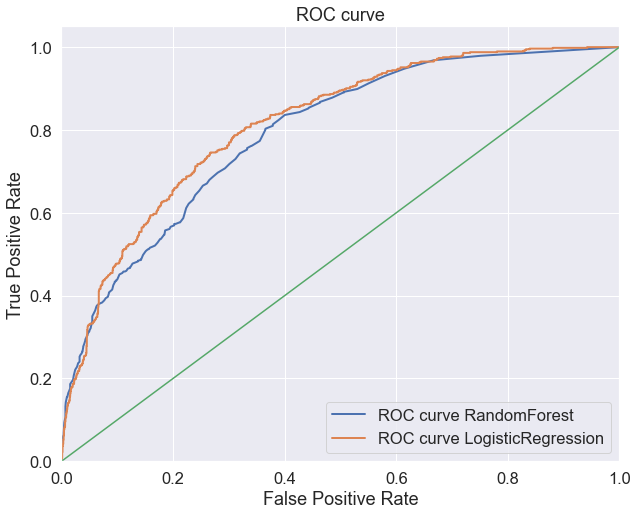

In [35]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
fpr, tpr, thresholds_ = roc_curve(y_test, preds[:,1], pos_label=1)
fpr_2, tpr_2, thresholds__2 = roc_curve(y_test_2, preds_2[:,1], pos_label=1)
lw = 2
plt.plot(fpr, tpr, lw=lw, label='ROC curve RandomForest')
plt.plot(fpr_2, tpr_2, lw=lw, label='ROC curve LogisticRegression')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.legend()
plt.savefig("ROC.png")
plt.show()

### Сохраним наш пайплайн

In [36]:
import dill
with open("model_RF.dill", "wb") as f:
    dill.dump(pipeline, f)